## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!pip install --upgrade nbformat

## Reading the files

In [2]:
df_train = pd.read_csv('C:/Users/gusta/Downloads/NewProject/data/train.csv')
df_test = pd.read_csv('C:/Users/gusta/Downloads/NewProject/data/test.csv')

In [4]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [24]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
'''
variable / definition /  key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton'''

In [ ]:
'''
Descritivo das variáveis:
    | PassangerId :         -- ID do passageiro (chave primaria);
    | Survived :            -- 1 Se o passageiro sobreviveu, caso contrário 0;
    | Pclass :              -- Classe do ticket (1st, 2nd and 3rd class);
    |                               > 1st = Upper / 2nd = Middle / 3rd = Lower
    | Age :                 -- Idade;
    |                               > A idade é de tipo float, se a idade for estimada estará no formato: xx.5
    | SibSp :               -- Número de parentes abordo do Titanic;
    |                               > Sibling = brother, sister, stepbrother, stepsister
    |                               > Spouse = husband, wife (mistresses and fiancés were ignored)
    | Parch :               -- Número de parentes abordo do Titanic;
    |                               > Parent = mother, father
    |                               > Child = daughter, son, stepdaughter, stepson
    |                               > Some children travelled only with a nanny, therefore parch=0 for them.
    | Fare :                -- Tarifa do passageiro
'''

## Explorando os dados

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df_train[pd.Series(df_train['Name']).str.contains('Jonkheer') == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [21]:
df_train[pd.Series(df_train['Name']).str.contains('Dr.') == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C


<Axes: xlabel='Pclass', ylabel='count'>

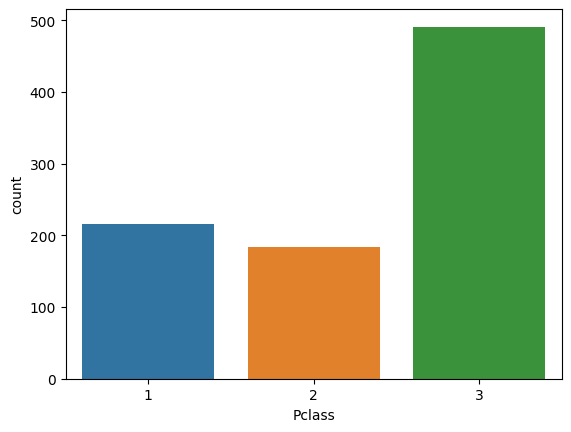

In [45]:
sns.countplot(x=df_train['Pclass'])

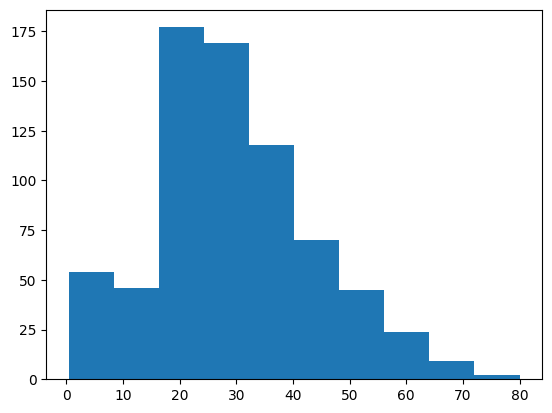

In [48]:
plt.hist(df_train['Age']);

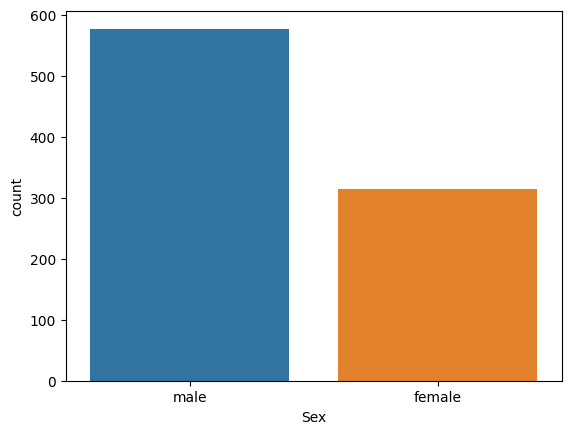

In [11]:
sns.countplot(x=df_train['Sex']);

In [10]:
grafico = px.scatter_matrix(
    data_frame=df_train,
    dimensions=['Pclass', 'Age', 'Sex'],
    color='Survived'
)

grafico.show()

In [17]:
px.scatter(
    data_frame=df_train,
    x=['Age'],
    color='Survived'
).show()

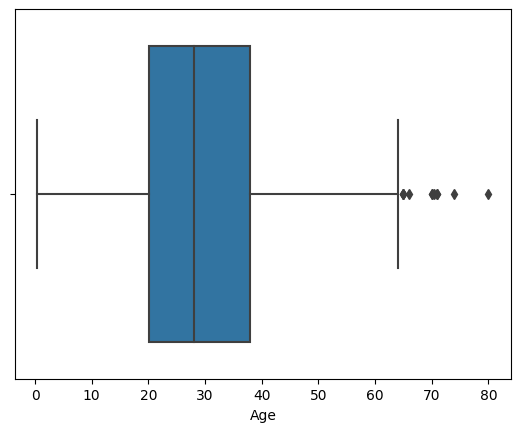

In [29]:
sns.boxplot(x=df_train['Age']);

In [43]:
px.density_heatmap(
    data_frame=df_train,
    x=['Pclass'],
    y='Survived'
).show()

## Data Cleaning

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train2 = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [5]:
df_train2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
df_train2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train2.loc[pd.isnull(df_train2['Age'])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [8]:
df_train2['Age'].fillna(df_train2['Age'].mean(), inplace=True)

In [9]:
df_train2.loc[pd.isnull(df_train2['Age'])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [11]:
df_train2.loc[df_train['PassengerId'].isin([6, 18, 879, 889])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,29.699118,0,0,8.4583,Q
17,1,2,male,29.699118,0,0,13.0000,S
878,0,3,male,29.699118,0,0,7.8958,S
888,0,3,female,29.699118,1,2,23.4500,S


In [12]:
df_train2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Atributos previsores e classe

In [14]:
X_titanic = df_train2.iloc[:,1:8]
X_titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [15]:
X_titanic = X_titanic.values

In [16]:
X_titanic

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.69911764705882, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [17]:
type(X_titanic)

numpy.ndarray

In [18]:
Y_titanic = df_train2.iloc[:,0]
Y_titanic

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
Y_titanic = Y_titanic.values
Y_titanic

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [20]:
type(Y_titanic)

numpy.ndarray

## Escalonamento dos atributos

In [21]:
#  Classe
X_titanic[:, 0].min(), X_titanic[:, 0].max()

(1, 3)

In [22]:
#  Age
X_titanic[:, 2].min(), X_titanic[:, 2].max()

(0.42, 80.0)

In [23]:
#  SibSp
X_titanic[:, 3].min(), X_titanic[:, 3].max()

(0, 8)

In [24]:
#  Parch
X_titanic[:, 4].min(), X_titanic[:, 4].max()

(0, 6)

In [25]:
#  Fare
X_titanic[:, 5].min(), X_titanic[:, 5].max()

(0.0, 512.3292)

In [26]:
#  Sex and Embarked is String

### OneHot & Standardisation & Normalization

In [27]:
!pip install scikit-learn

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

label_enconder_test = LabelEncoder()
teste = label_enconder_test.fit_transform(X_titanic[:, 1])


# scaler_train = StandardScaler()
# X_titanic = scaler_train.fit_transform(X_titanic)

In [29]:
X_titanic[:, 1]

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [30]:
teste

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [31]:
for k, v in enumerate(X_titanic):
    if k < 10:
        print(v)

# Colunas strings: 1, 6

[3 'male' 22.0 1 0 7.25 'S']
[1 'female' 38.0 1 0 71.2833 'C']
[3 'female' 26.0 0 0 7.925 'S']
[1 'female' 35.0 1 0 53.1 'S']
[3 'male' 35.0 0 0 8.05 'S']
[3 'male' 29.69911764705882 0 0 8.4583 'Q']
[1 'male' 54.0 0 0 51.8625 'S']
[3 'male' 2.0 3 1 21.075 'S']
[3 'female' 27.0 0 2 11.1333 'S']
[2 'female' 14.0 1 0 30.0708 'C']


In [32]:
label_enconder_sex = LabelEncoder()
X_titanic[:, 1] = label_enconder_sex.fit_transform(X_titanic[:, 1])

label_enconder_port = LabelEncoder()
X_titanic[:, 6] = label_enconder_port.fit_transform(X_titanic[:, 6])

In [33]:
for k, v in enumerate(X_titanic):
    if k < 10:
        print(v)

[3 1 22.0 1 0 7.25 2]
[1 0 38.0 1 0 71.2833 0]
[3 0 26.0 0 0 7.925 2]
[1 0 35.0 1 0 53.1 2]
[3 1 35.0 0 0 8.05 2]
[3 1 29.69911764705882 0 0 8.4583 1]
[1 1 54.0 0 0 51.8625 2]
[3 1 2.0 3 1 21.075 2]
[3 0 27.0 0 2 11.1333 2]
[2 0 14.0 1 0 30.0708 0]


In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
one_hot_train = ColumnTransformer(transformers=[('OneHot', 
                                                 OneHotEncoder(), 
                                                 [1, 6])], 
                                  remainder='passthrough')

In [36]:
X_titanic = one_hot_train.fit_transform(X_titanic)

In [37]:
X_titanic[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3, 22.0, 1, 0, 7.25], dtype=object)

In [38]:
X_titanic.shape

(891, 11)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler_titanic = StandardScaler()
X_titanic = scaler_titanic.fit_transform(X_titanic)

In [40]:
X_titanic

array([[-0.73769513,  0.73769513, -0.48204268, ...,  0.43279337,
        -0.47367361, -0.50244517],
       [ 1.35557354, -1.35557354,  2.0745051 , ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 1.35557354, -1.35557354, -0.48204268, ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [ 1.35557354, -1.35557354, -0.48204268, ...,  0.43279337,
         2.00893337, -0.17626324],
       [-0.73769513,  0.73769513,  2.0745051 , ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [-0.73769513,  0.73769513, -0.48204268, ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

## Separação de bases de treinamento e teste

In [41]:
from sklearn.model_selection import train_test_split

In [48]:
X_titanic_treinamento, X_titanic_test, y_titanic_treinamento, y_titanic_test = train_test_split(
    X_titanic,
    Y_titanic,
    test_size=0.25,
    random_state=0
)

In [45]:
X_titanic.shape, Y_titanic.shape

((891, 11), (891,))

In [50]:
X_titanic_treinamento.shape, X_titanic_test.shape

((668, 11), (223, 11))

In [52]:
y_titanic_treinamento.shape, y_titanic_test.shape

((668,), (223,))

# Salvando as bases em Pickle

In [53]:
import pickle

with open('titanic.pkl', mode='wb') as f:
    pickle.dump(
        [X_titanic_treinamento, y_titanic_treinamento,
         X_titanic_test, y_titanic_test], f
    )

# Start ML training

In [6]:
import pickle
with open('titanic.pkl', mode='rb') as f:
    X_treinamento, y_treinamento, X_test, y_test = pickle.load(f)

In [7]:
X_treinamento.shape, y_treinamento.shape

((668, 11), (668,))

In [8]:
X_test.shape, y_test.shape

((223, 11), (223,))

In [9]:
from sklearn.naive_bayes import GaussianNB

In [11]:
nayve_train = GaussianNB()
nayve_train.fit(X_treinamento, y_treinamento)

GaussianNB()

In [12]:
nayve_previsao = nayve_train.predict(X_test)

In [13]:
nayve_previsao

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
accuracy_score(y_test, nayve_previsao)

0.672645739910314

In [28]:
confusion_matrix(y_test, nayve_previsao)

array([[138,   1],
       [ 72,  12]], dtype=int64)

In [30]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     -------------------------------------- 282.6/282.6 kB 8.8 MB/s eta 0:00:00


In [31]:
from yellowbrick.classifier import ConfusionMatrix

0.672645739910314

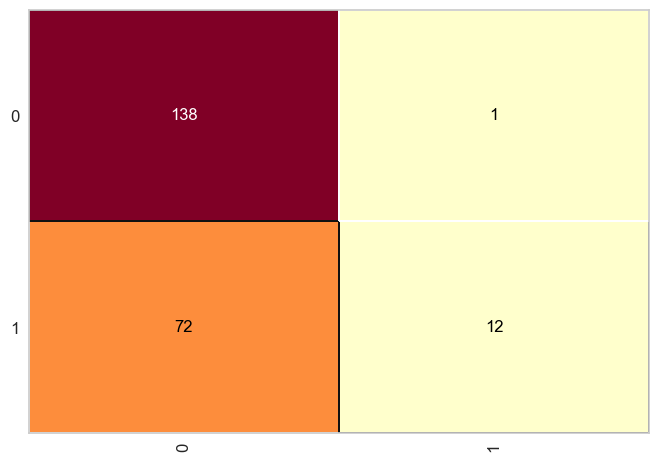

In [33]:
cm = ConfusionMatrix(nayve_train)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_test, y_test)